# Machine Learning In Python
## Lab One: Exploring Table Data
Authors:
* Travis Peck - Graduate
* Quinn Matthews - Undergraduate
* Tyler Olbright - Undergraduate
* Chris Hirschbrich - Undergraduate

# Business Understanding
This dataset contains data about employees of an undisclosed Indian company. Features of the dataset include the highest education level of its employees, year of joining, city where the employee is based out of, the 'salary tier' of the employees, age and gender of the employees, a binary column of if an employee has ever been 'benched' (temporarily assigned no work), how many years of related experience the employees have, and whether the employee left the company or not. This last feature is the variable we are trying to predict (dependent variable), using all of the previous data as the predictor variables. This company was trying to determine what factors are indicative of if an employee chooses to leave the company or not. This can, of course, be useful to other companies who are trying to increase their employee retention rate. In order for an predictive algorithm to be considered useful, there should be a statistically significant correlation between the dependent and independent variables. Alternatively, we can use this data to make a decision tree that could help classify whether a particular employee will likely leave or not. 


Dataset: [Employee Dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)

In [46]:
# Import Data
import pandas as pd
import numpy as np

df = pd.read_csv('./Employee.csv')

# Data Preprocessing
# Convert EverBenched to 0 and 1
df['EverBenched'] = df['EverBenched'].map({'Yes': 1, 'No': 0})

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,0,0,0
1,Bachelors,2013,Pune,1,28,Female,0,3,1
2,Bachelors,2014,New Delhi,3,38,Female,0,2,0
3,Masters,2016,Bangalore,3,27,Male,0,5,1
4,Masters,2017,Pune,3,24,Male,1,2,1


# Data Understanding
## Data Description
| Column Name | Description | Type | Range |
| --- | --- | --- | --- |
| Education | Highest education level of the employee | Categorical | 'Bachelors', 'Masters', 'PHD' |
| JoiningYear | Year the employee joined the company | Integer | 2012 - 2018 |
| City | City where the employee is based out of | Categorical | 'Bangalore', 'Pune', 'New Delhi' |
| PaymentTier | Salary tier of the employee | Categorical | 1 - 3 |
| Age | Age of the employee | Integer | 22 - 41 |
| Gender | Gender of the employee | Categorical | 'Male', 'Female' |
| EverBenched | Binary column of if an employee has ever been 'benched' | Binary | 0 - 1 |
| ExperienceInCurrentDomain | Years of related experience the employee has | Integer | 0 - 7 |
| LeftOrNot | Whether the employee left the company or not | Binary | 0 - 1 |



In [153]:
print(df.dtypes)


Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                   int64
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


## Data Quality

### Missing Values

In [141]:
# Show the number of missing values in each column
print(df.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


As shown above, there are no missing values in the data set.

### Duplicates

In [142]:
# Show the number of duplicated rows
print(df.duplicated().sum())

# Show as a percentage the number of duplicated rows
print((df.duplicated().sum() / df.shape[0] * 100).round(3), '%')

1889
40.597 %


There are a significant number of duplicates in the dataset. This is likely due to the fact that the company has multiple employees with the same characteristics (e.g. multiple employees with the same education level, joining year, city, etc.). This large of a number of duplicates is slightly suprising, but it is not necessarily unrealistic. It is possible that the company actually does have a large number of employees with the same characteristics and there are no ID numbers to differentiate between them. For this reason, we decided to not remove the duplicates from the dataset.

## Data Visualization
### Exploratory Distribution Plots

In [154]:
# Initial Data Exploration
df.describe()

,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,0.102729,2.905652,0.343864
std,1.863377,0.561435,4.826087,0.303638,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,0.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,0.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,0.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,1.000000,7.000000,1.000000


First we wanted to start by visualizing the individual distributions of the features in the dataset. This will give us a better understanding of the data and help us to identify any potential outliers or other issues with the data.

<Axes: xlabel='City'>

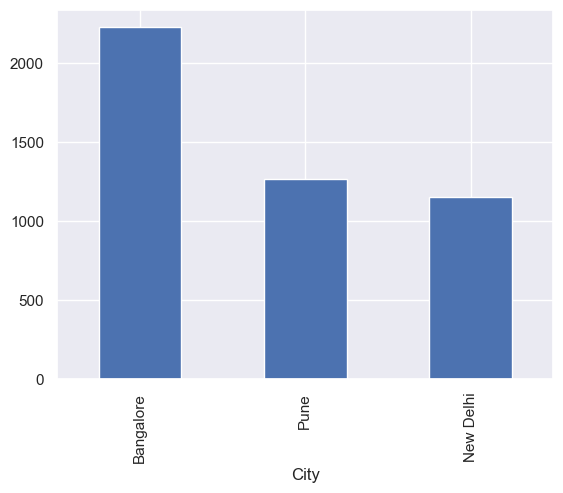

In [169]:
import matplotlib
import matplotlib.pyplot as plt

# Show bar plot of cities
df['City'].value_counts().plot(kind='bar')



This graph shows how many employees work in each of the three cities in India. We see a significantly higher number of people are based in Bangalore than the 2 other cities, Pune and New Delhi. Pune and New Delhi, however, have similar quantities of employees working in them.

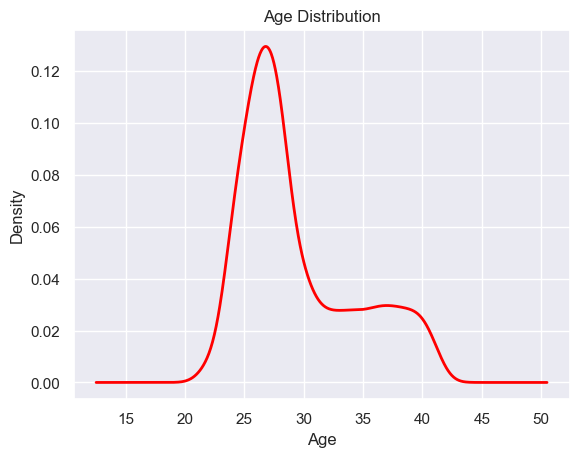

In [170]:
# Show kde plot of age
df['Age'].plot.kde(
    bw_method=0.2,
    color='red',
    linewidth=2
    )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

It is interesting the age distribution of employees is so tightly packed in the 25-30 range. A boxplot of the age distribution of employees may also be useful to look at.

Text(0.5, 1.0, 'Age Distribution')

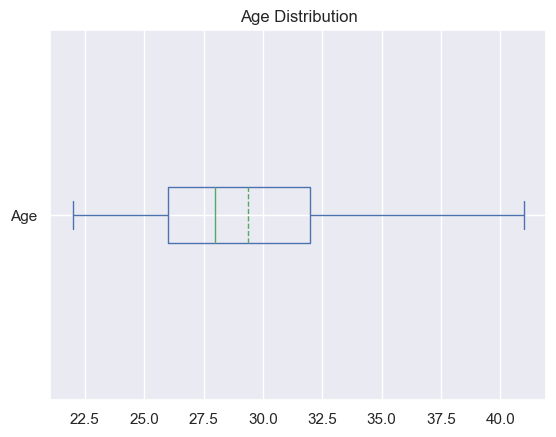

In [177]:
# Show box plot of age
df['Age'].plot.box(
    vert=False,
    showmeans=True,
    meanline=True,
    )
plt.title('Age Distribution')

With some basic understanding of the data we can also start comparing the features to the dependent variable, 'LeftOrNot'. This will help us to identify which features are most likely to be useful in predicting if an employee will leave the company or not.

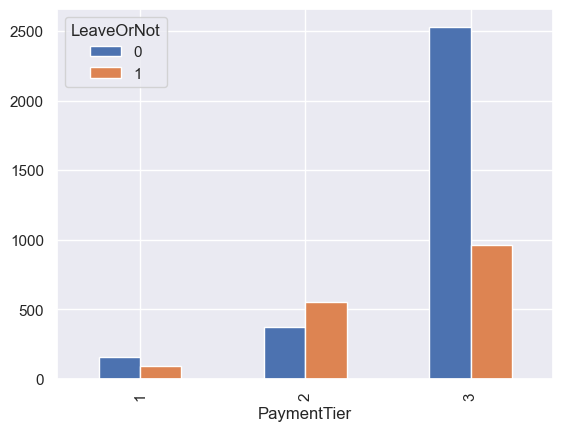

In [144]:
crosstb = pd.crosstab(df['PaymentTier'], df['LeaveOrNot'])
barplot = crosstb.plot.bar()

The graph above groups employees into the three different payment tiers and whether or not they left the company. The data does not explain whether a higher payment tier number means more pay (Ex. If a payment tier of 1 is higher or lower than tier 3). However, we noticed the vast majority of employees fall into the 3rd payment tier, and most of the employees in the 3rd payment tier have not left the company.

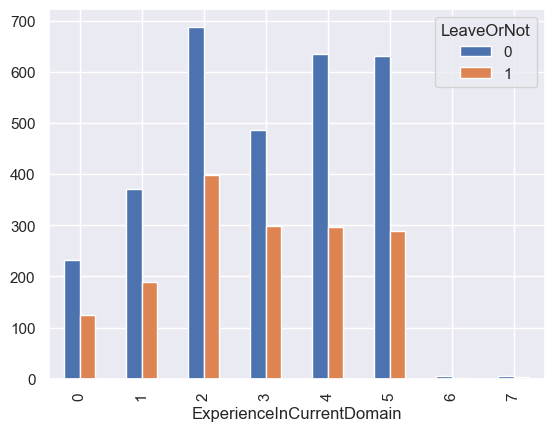

In [145]:
crosstab = pd.crosstab(df['ExperienceInCurrentDomain'], df['LeaveOrNot'])
barplot = crosstab.plot.bar()

Based on the above crosstab plot, it doesn't look like past experience in the current domain is a good indicator of whether an employee will leave the company or not. The ratio of employees who left and stayed looks to fairly consistent across all levels of experience, we can further confirm this in the correlation matrix later on in our analysis.

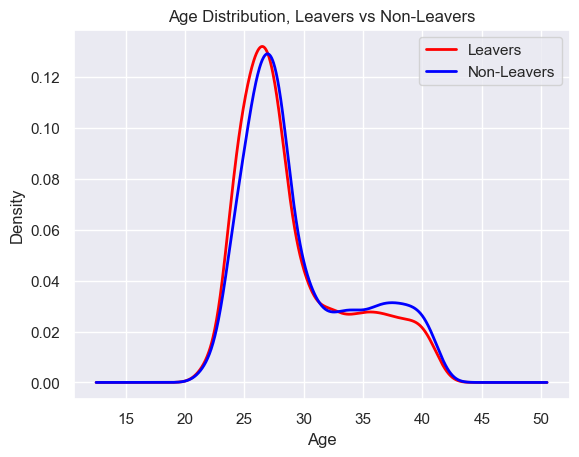

In [191]:
import seaborn as sns
# sns.violinplot(x='Age',
#                hue='LeaveOrNot',
#                split="True", 
#                inner="quart",
#                data=df)
df.where(df['LeaveOrNot'] == 1)['Age'].plot.kde(
    bw_method=0.2,
    color='red',
    linewidth=2
    )

df.where(df['LeaveOrNot'] == 0)['Age'].plot.kde(
    bw_method=0.2,
    color='blue',
    linewidth=2
    )

plt.title('Age Distribution, Leavers vs Non-Leavers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(['Leavers', 'Non-Leavers'])


plt.show()

Again we can see in the above overlay of the age distributions seperated by 'LeaveOrNot'  the compactness of the age distribution of employees but it doesn't appear to be a good indicator of whether an employee will leave the company or not as the distribution of ages is fairly consistent between employees who left and stayed.

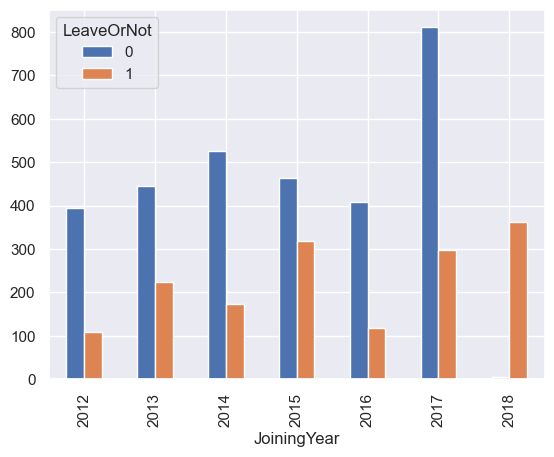

In [148]:
crosstb = pd.crosstab(df['JoiningYear'], df['LeaveOrNot'])

barplot = crosstb.plot.bar()


The joining year does have some interesting trends when it comes to whether an employee left or not. One of the most interesting things to note is that apparently no employees who joined in 2018 left the company. This could be due to the fact that the data was collected in 2018 and the employees who joined in 2018 have not had enough time to leave the company yet. Less likely, but also possible, is that it could be due to the fact that the company has a very high retention rate for employees who joined in 2018. This could be a useful feature to include in our predictive model which we can further explore in the correlation matrix but we may need to make a decision on how to handle the 2018 data if we decide to use it in our model. It's also possible that we could convert the 'JoiningYear' column into a 'YearsAtCompany' column by subtracting the 'JoiningYear' from the current year and use that as a feature instead which would likely prove more useful since using the 'JoiningYear' as a feature would likely lead to overfitting and not generalize well to new data.

## Data Correlation
It's important to see if there are any high levels of correlation between the variables in the dataset because this can help us understand if there are any single factors that are highly indicative of whether an employee will leave the company or not. It is also important to see if there are any high levels of correlation between the independent variables, as this can lead to multicollinearity in the model.

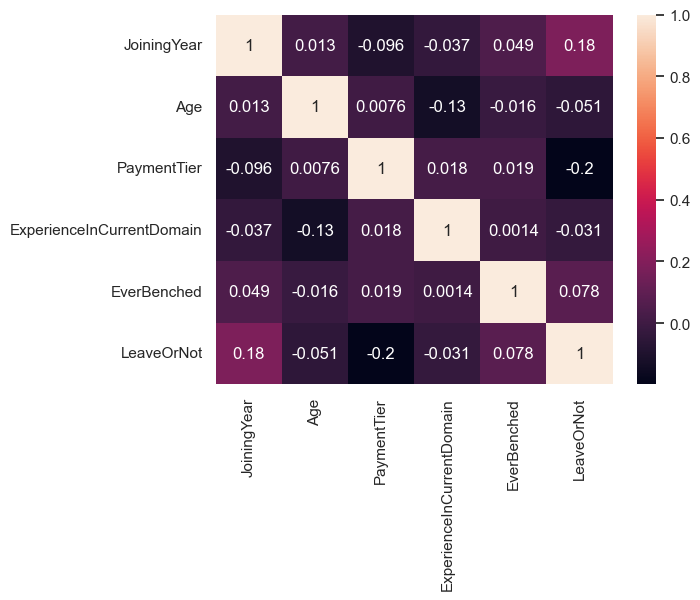

In [149]:
selected_columns = df[['JoiningYear', 'Age', 'PaymentTier', 'ExperienceInCurrentDomain', 'EverBenched', 'LeaveOrNot']] # Not Shown: Education, City, Gender 
correlation_matrix = selected_columns.corr() 
sns.heatmap(correlation_matrix, annot=True)
plt.show()

It looks like there is some negative correlation between the payment tier and whether or not the employee left the company. Based on the data, if the pay is in tier 3, then people tend to not want to leave the company, this appears to be the greatest correlation on the plot, so pay is the leading reason why people stay with the company. It also looks like a positive correlation between the joining year and whether or not the employee left the company which could also be an interesting factor to look into.

# UMAP

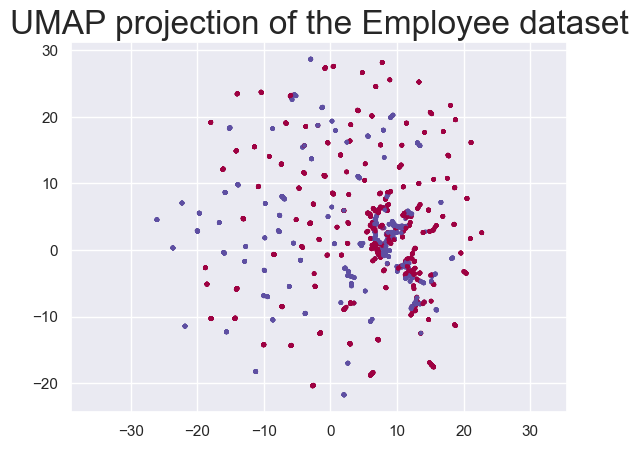

In [156]:
import umap

reducer = umap.UMAP(
    n_neighbors=10,
    min_dist=0.1,
    metric='correlation',
)
embedding = reducer.fit_transform(selected_columns)
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=df['LeaveOrNot'],
            cmap='Spectral',
            s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Employee dataset', fontsize=24)
plt.show()

UMAP is typically used to reduce highty dimensional data to a few dimensions to make it easier and faster to perform. It takes multi-dimensional data and using Riemannian geometry maps each data point to it's nearest neighbors. It then maps those data points to a two-dimensional space in a way that best preserves the structure of the data features. This is useful for visualizing high-dimensional data in a 2D space however may not be particularly useful for this dataset as we only have 6 features.

# Sources
* https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset
* https://github.com/lmcinnes/umap
* https://pair-code.github.io/understanding-umap/
